<a href="https://colab.research.google.com/github/dushyantsinghraghav/Advanced-ML/blob/main/Different_feature_engineering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Import the adult income dataset and then read it
#!pip install mglearn
import mglearn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                 names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                        'marital_status','occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country',
                        'income'])
data.head(10)


,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [4]:
##for illustration purposes we only select few columns
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

In [5]:
print("original features:\n", list(data.columns), "\n")
#lets do the one hot enconding on the categorical columns
data_dummies = pd.get_dummies(data)
data_dummies.head()
print("features after get dummies:\n",list(data_dummies.columns))

original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

features after get dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
data_dummies.head(10)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,37,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,49,16,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7,52,45,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
8,31,50,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9,42,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
#lets apply numpy array and then use it for training the model
#Extract the numpy arrays
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [11]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


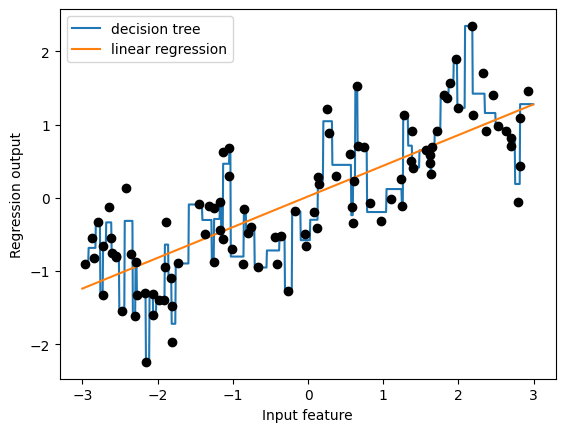

In [12]:
##binning and discretisation
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [14]:
#lets use binning on the linear_model and discretisation
bins = np.linspace(-3, 3, 11)
print("bins : {}".format(bins))

bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [15]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [21]:
#lets use one hot encoder
 #lets use one hot encoder
import sklearn
from sklearn.preprocessing import OneHotEncoder
# Remove the 'sparse' argument and let it default to True or use 'sparse_output'
# if using a version of scikit-learn >= 1.2.
encoder = OneHotEncoder(sparse_output=False) # Replace sparse with sparse_output for newer versions
#encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
#transform creates the one hot encoding
one_hot = encoder.transform(which_bin)
# Convert to dense array if needed
X_binned = encoder.transform(which_bin)
print("X_binned.shape: {}".format(X_binned.shape))
print(X_binned[:5]) # Convert to dense array if needed

X_binned.shape: (100, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


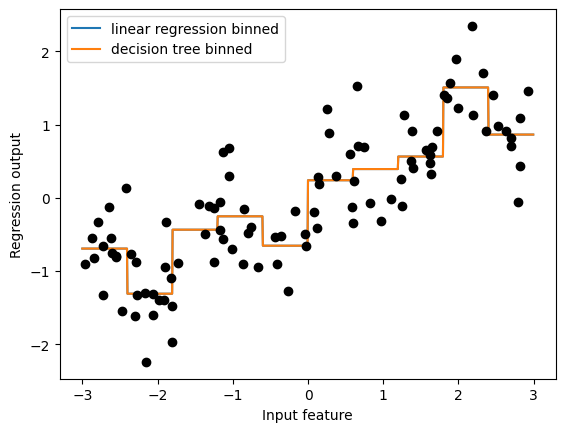

In [24]:
#Now we again build a linear regression model and decision tree model
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [25]:
#Interaction and polynomials
X_combined = np.hstack([X, X_binned])
print("Combined shape: {}".format(X_combined.shape))

Combined shape: (100, 11)


Text(0.5, 0, 'Input feature')

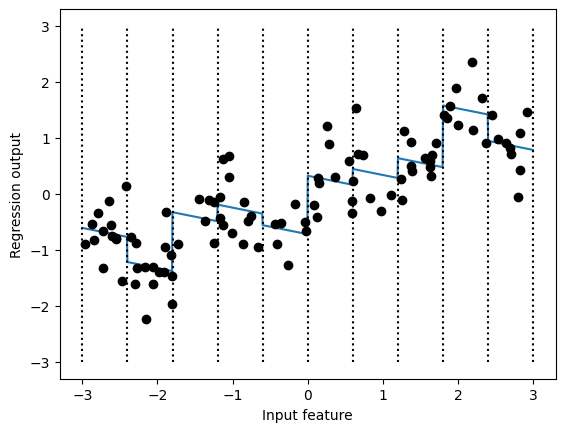

In [26]:
#lets train other linear regression model
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin  in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [27]:
#now we create a polynomial feature
X_product = np.hstack([X_binned, X * X_binned])
print("Combined shape: {}".format(X_product.shape))

Combined shape: (100, 20)


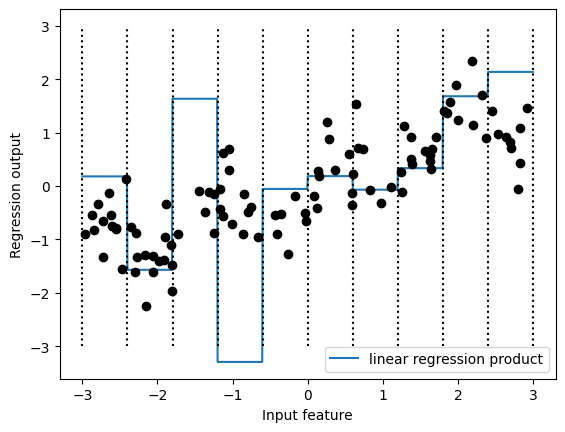

In [30]:
#Now we train other linear regression model for the polynmoial feature created above
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line_binned * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [31]:
#lets do the polynomial method as well and plot it to understand it better
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape: {}".format(X_poly.shape))
print("Entries of X :\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)
Entries of X :
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [33]:
#to get the semantics of the features
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


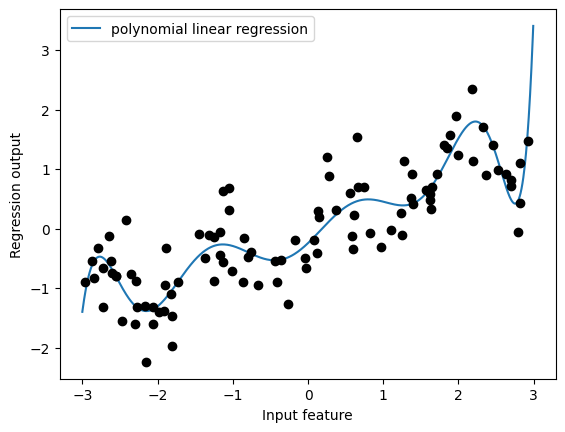

In [34]:
#lets train a linear regression model on this and visulaise it to understand it better
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


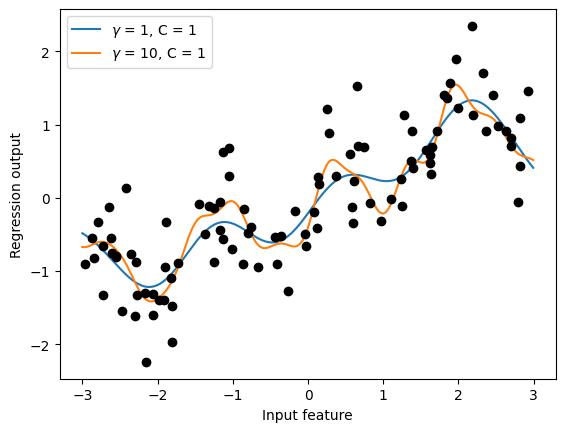

In [36]:
from sklearn.svm import SVR
for gamma in [1, 10]:

        # We specify gamma=auto as a comparison to other
        # radial basis kernel
        svm = SVR(gamma=gamma).fit(X,y)
        plt.plot(line, svm.predict(line), label='$\gamma$ = {}, C = {}'.format(gamma, C))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [40]:
#Using univariate non linear transformations
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
print(X_org[1:10])
w = rnd.normal(size=3)
print(w)
X = np.random.poisson(10 * np.exp(X_org))
print(X[1:10])
y = np.dot(X_org, w)
print(y[1:10])

[[ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574 -2.55298982]
 [ 0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852]
 [-0.18718385  1.53277921  1.46935877]]
[ 1.59327362  0.5687224  -0.11448705]
[[93 73  4]
 [31  9 13]
 [12  9 33]
 [19 18 16]
 [16 50 10]
 [10  6  2]
 [12 26  1]
 [97  3  9]
 [10 39 32]]
[4.74436373 1.4394878  0.56962109 1.23092405 1.4048387  0.30534339
 1.61798577 2.78397106 0.40526824]


In [41]:
#let print the number of feature appearances
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[25 38 48 56 63 52 43 62 37 45 44 36 28 37 32 26 25 26 18 16  8 20 11 15
 12 18  5 11 10  1 15  6  3  7  5  5  3  4  2  2  3  4  6  1  2  3  3  4
  3  0  5  2  2  2  0  1  4  0  3  1  1  1  0  2  1  3  0  0  0  3  2  0
  0  0  0  0  1  1  0  0  1  1  0  0  0  0  0  0  0  1  0  1  1  1  3  1
  0  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1]


Text(0.5, 0, 'Feature value')

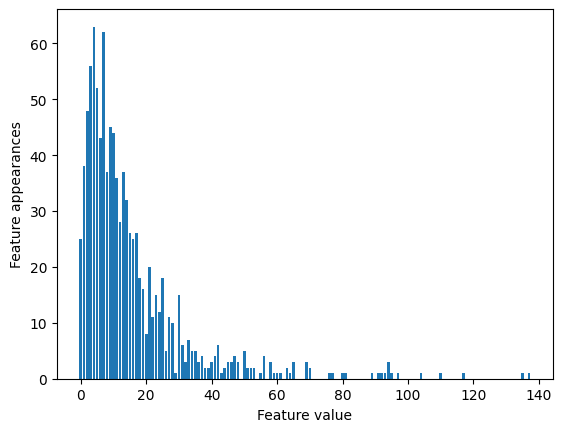

In [42]:
#lets plot it to understand it better
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Feature appearances")
plt.xlabel("Feature value")


In [43]:
#lets train a linear model
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

Training set score: 0.66


In [44]:
#Now do the log and exponential and see whether the accuracy improves or not
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

In [45]:
#BUILD the ridge model on the new data points
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.869
